In [4]:
!pip install pandas matplot numpy

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
data = pd.read_csv("archive/okcupid_profiles.csv")

In [22]:
#Contagem de dados do nosso dataset (nº de linhas, qntd de colunas)
data.shape

(59946, 31)

## Os atributos e seus tipos estão especificados abaixo.

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

Abaixo, temos algumas métricas sobre os dados numéricos do dataset. Podemos verificar que a idade média das pessoas é 33 anos.

In [24]:
data.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [36]:
age_counts = data['age'].value_counts()

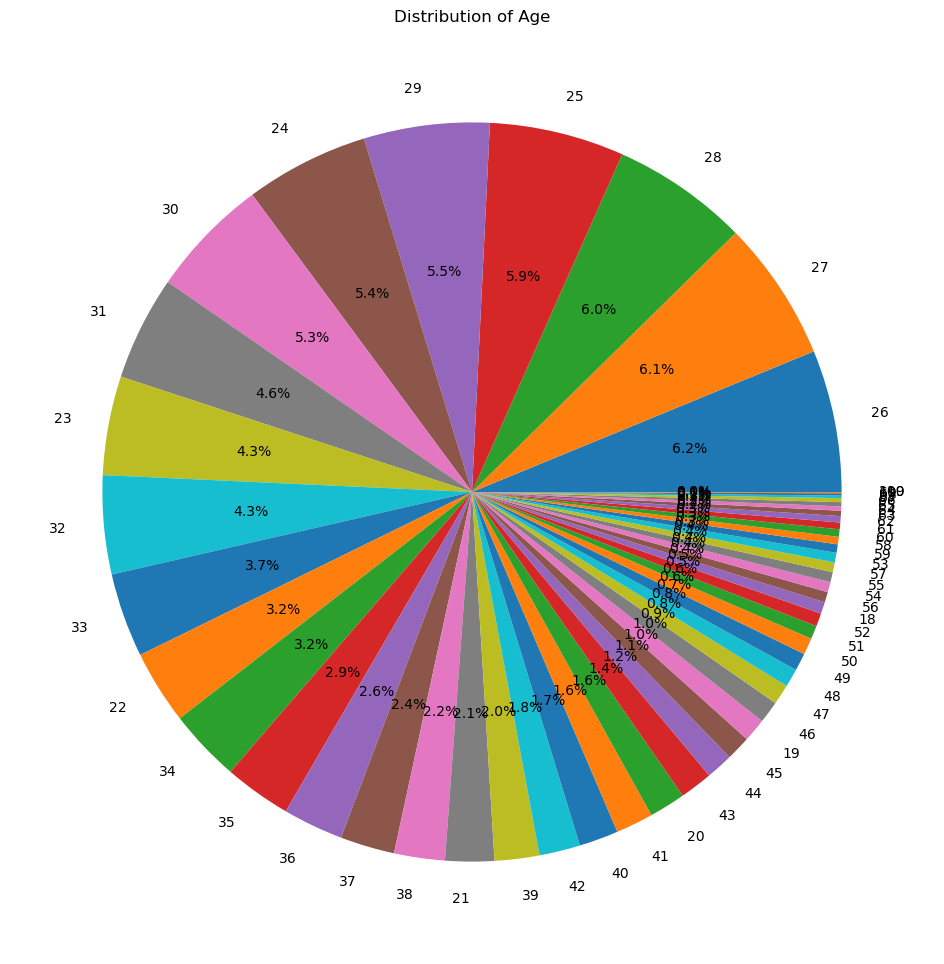

In [39]:
plt.figure(figsize=(12,12))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Age")
plt.show()

In [25]:
ethinicity_counts = data['ethnicity'].value_counts()

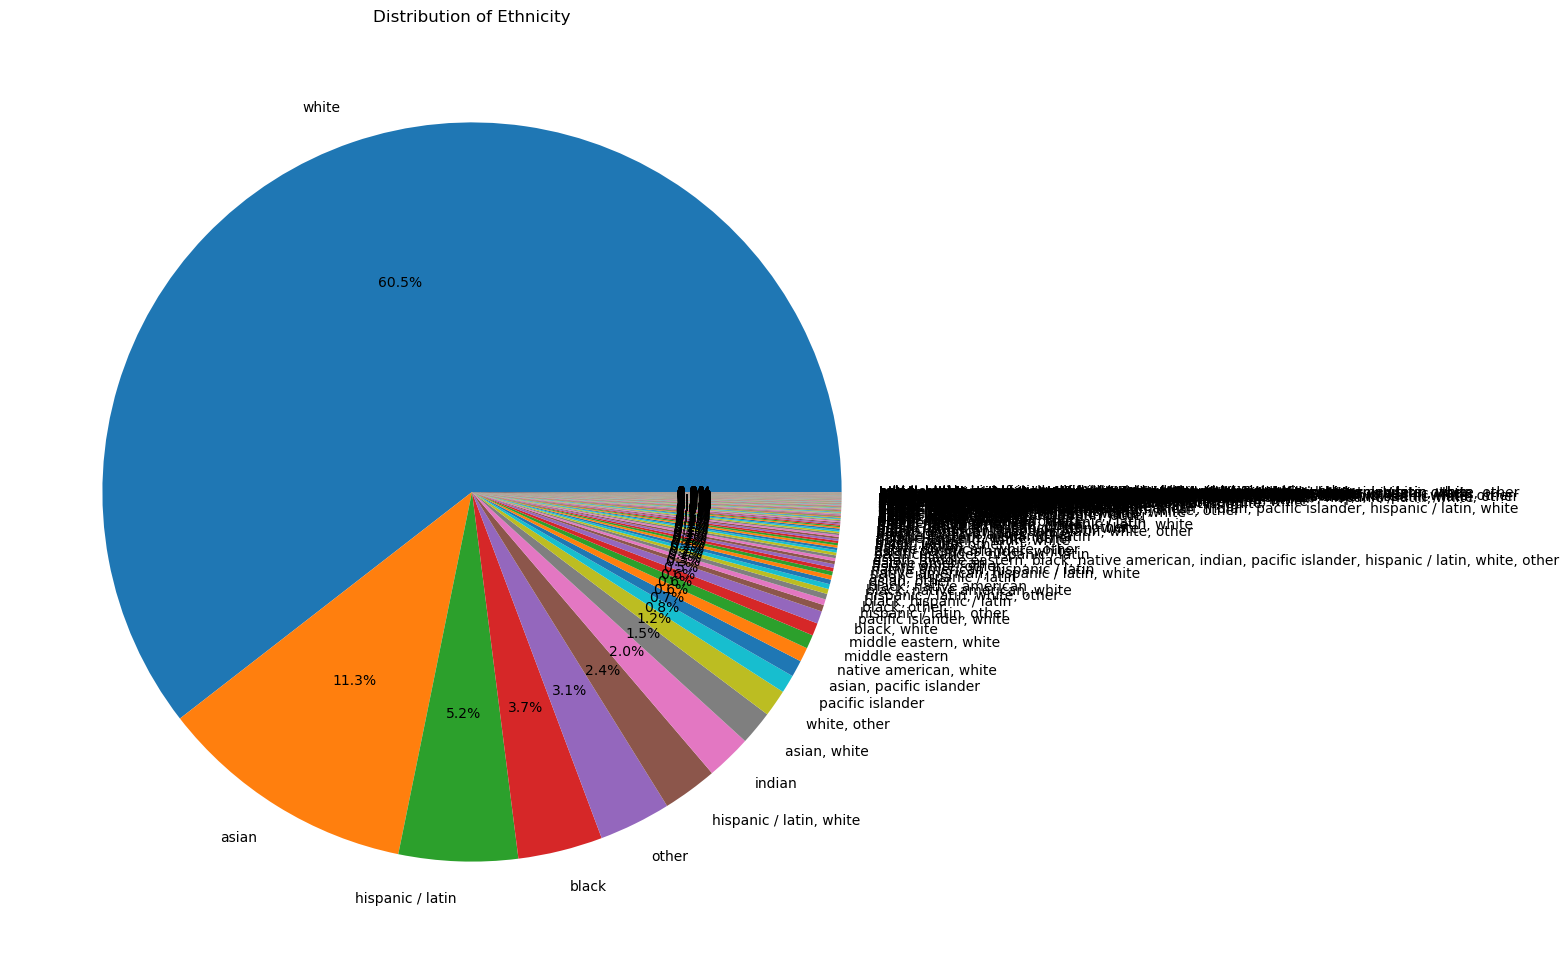

In [41]:
# Create pie chart
plt.figure(figsize=(12,12))
plt.pie(ethinicity_counts, labels=ethinicity_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Ethnicity')
plt.show()

Sobre a etnia dos dados, podemos verificar pela célula abaixo que a maioria das pessoas são brancas.

In [30]:
orientation_counts = data['orientation'].value_counts()

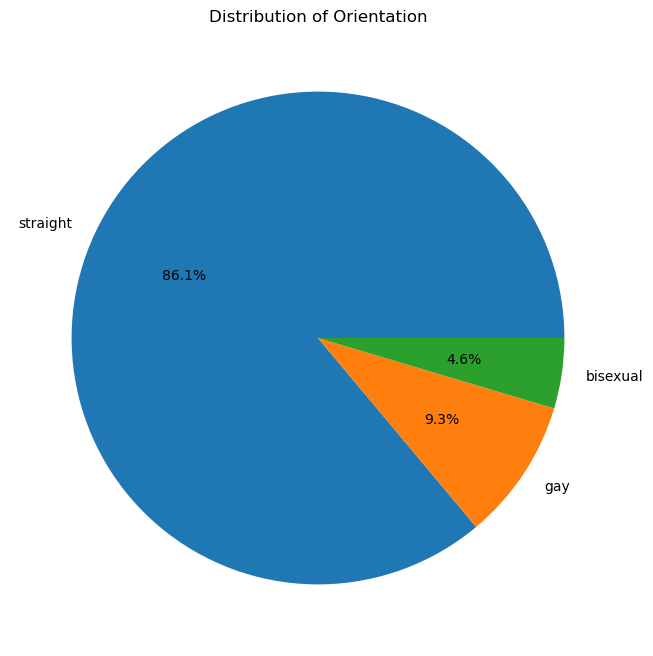

In [48]:
plt.figure(figsize=(8, 8))
plt.pie(orientation_counts, labels=orientation_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Orientation')
plt.show()

A maioria das pessoas são heterossexuais. 

Para facilitar as métricas de fairness, iremos remover as linhas em que as colunas 'ethnicity', 'orientation' ou 'age' estão vazias e as linhas com valores duplicados, já que esses dados serão importantes para análises posteriores.

In [35]:
data_cleaned = data.dropna(subset=['ethnicity', 'orientation', 'age'])
data_cleaned.drop_duplicates()
data_cleaned.shape

(54266, 31)

Agora, vamos usar One-Hot Encoding para transformar a variável categórica "orientation" para valores numéricos. Isso fará com que o dataset agora tenha três colunas para orientação: 'orientation_gay', 'orientation_straight' e 'orientation_bisexual'. Cada coluna vai conter 1 para a linha indicada, ou seja, se um indivíduo é hétero, ficará 0, 1, 0, respectivamente.

In [47]:
data = pd.DataFrame({'orientation': ['straight', 'gay', 'bisexual']})
one_hot_encoded = pd.get_dummies(data['orientation'], prefix='orientation')
data_encoded = pd.concat([data, one_hot_encoded],axis=1)